# Speed and Memory Bencmarking

Just comparing language models on their performance on a specific task or a benchmark turns out to be no longer sufficient. We now must take care of the computational cost of a particular model for a given environment (RAM, CPU, GPU, TPU) in terms of memory usage and the speed. The computational cost of training and deploying to production for inference are two main values to be measured. Two classes of transformers libary, `PyTorchBenchmark` and `TensorFlowBenchmark`, make it possible to benchmark models for both TensorFlow and PyTorch.

仅仅比较语言模型在特定任务或基准测试中的性能是不够的. 我们现在必须考虑特定模型在给定环境下(RAM、CPU、GPU、TPU)内存使用和速度方面的计算成本. 训练和部署到生产中进行推理的计算成本是需要测量的两个主要值. transformers 库的两个类 PyTorchBenchmark 和 TensorFlowBenchmark 使得对 TensorFlow 和 PyTorch 的模型进行基准测试成为可能.

In [1]:
!nvidia-smi

Wed Feb 26 02:42:47 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   50C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import torch

print(
    f"The GPU total memory is {torch.cuda.get_device_properties(0).total_memory /(1024**3)} GB"
)

The GPU total memory is 14.74127197265625 GB


In [ ]:
!pip install -r requirements.txt

In [8]:
from transformers import PyTorchBenchmark, PyTorchBenchmarkArguments

models = ["distilbert-base-uncased", "distilroberta-base", "albert-base-v2"]
batch_sizes = [16]
sequence_lengths = [64, 128, 256, 512]

# help(PyTorchBenchmarkArguments)
args = PyTorchBenchmarkArguments(
    models=models, batch_sizes=batch_sizes, sequence_lengths=sequence_lengths
)
# args = PyTorchBenchmarkArguments(
#     models=models, batch_sizes=batch_sizes, sequence_lengths=sequence_lengths, cuda=False, tpu=False
# )
print("args:", args)
print("args:", args.device)
print("args:", args.device_idx)
print("args:", args.is_gpu)
print("args:", args.is_tpu)
print("args:", args.n_gpu)

benchmark = PyTorchBenchmark(args)
print("benchmark:", benchmark)

args: PyTorchBenchmarkArguments(models=['distilbert-base-uncased', 'distilroberta-base', 'albert-base-v2'], batch_sizes=[16], sequence_lengths=[64, 128, 256, 512], inference=True, cuda=True, tpu=True, fp16=False, training=False, verbose=False, speed=True, memory=True, trace_memory_line_by_line=False, save_to_csv=False, log_print=False, env_print=False, multi_process=True, inference_time_csv_file='inference_time_1740537837.csv', inference_memory_csv_file='inference_memory_1740537837.csv', train_time_csv_file='train_time_1740537837.csv', train_memory_csv_file='train_memory_1740537837.csv', env_info_csv_file='env_info_1740537837.csv', log_filename='log_1740537837.csv', repeat=3, only_pretrain_model=False, torchscript=False, torch_xla_tpu_print_metrics=False, fp16_opt_level='O1')
args: cuda
args: 0
args: True
args: False
args: 1
benchmark: <transformers.benchmark.benchmark.PyTorchBenchmark object at 0x7d5700713650>


In [9]:
from transformers import PyTorchBenchmark, PyTorchBenchmarkArguments

models = [
    "bert-base-uncased",
    "distilbert-base-uncased",
    "distilroberta-base",
    "distilbert-base-german-cased",
]
batch_sizes = [4]
sequence_lengths = [32, 64, 128, 256, 512]
args = PyTorchBenchmarkArguments(
    models=models,
    batch_sizes=batch_sizes,
    sequence_lengths=sequence_lengths,
    multi_process=False,
)
print("args:", args)

benchmark = PyTorchBenchmark(args)
print("benchmark:", benchmark)

args: PyTorchBenchmarkArguments(models=['bert-base-uncased', 'distilbert-base-uncased', 'distilroberta-base', 'distilbert-base-german-cased'], batch_sizes=[4], sequence_lengths=[32, 64, 128, 256, 512], inference=True, cuda=True, tpu=True, fp16=False, training=False, verbose=False, speed=True, memory=True, trace_memory_line_by_line=False, save_to_csv=False, log_print=False, env_print=False, multi_process=False, inference_time_csv_file='inference_time_1740537837.csv', inference_memory_csv_file='inference_memory_1740537837.csv', train_time_csv_file='train_time_1740537837.csv', train_memory_csv_file='train_memory_1740537837.csv', env_info_csv_file='env_info_1740537837.csv', log_filename='log_1740537837.csv', repeat=3, only_pretrain_model=False, torchscript=False, torch_xla_tpu_print_metrics=False, fp16_opt_level='O1')


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/464 [00:00<?, ?B/s]

benchmark: <transformers.benchmark.benchmark.PyTorchBenchmark object at 0x7d570e274090>


In [11]:
# it takes time depending on your  CPU/GPU capacity and selection
results = benchmark.run()
results

1 / 4
2 / 4
3 / 4
4 / 4

====================       INFERENCE - SPEED - RESULT       ====================
--------------------------------------------------------------------------------
          Model Name             Batch Size     Seq Length     Time in s   
--------------------------------------------------------------------------------
      bert-base-uncased              4               32            0.011     
      bert-base-uncased              4               64             0.02     
      bert-base-uncased              4              128            0.038     
      bert-base-uncased              4              256             0.07     
      bert-base-uncased              4              512            0.148     
   distilbert-base-uncased           4               32            0.007     
   distilbert-base-uncased           4               64            0.012     
   distilbert-base-uncased           4              128            0.023     
   distilbert-base-uncased      

BenchmarkOutput(time_inference_result={'bert-base-uncased': {'bs': [4], 'ss': [32, 64, 128, 256, 512], 'result': {4: {32: 0.011005842399993072, 64: 0.019692579800005206, 128: 0.037999135000006845, 256: 0.07035922530000108, 512: 0.1476018389000046}}}, 'distilbert-base-uncased': {'bs': [4], 'ss': [32, 64, 128, 256, 512], 'result': {4: {32: 0.0068811151999966565, 64: 0.011984029500001724, 128: 0.022662802899992583, 256: 0.04362075650000179, 512: 0.08917616989999715}}}, 'distilroberta-base': {'bs': [4], 'ss': [32, 64, 128, 256, 512], 'result': {4: {32: 0.007792756599997119, 64: 0.014703578700004983, 128: 0.028341755700000703, 256: 0.05273149709998961, 512: 0.11080991750000066}}}, 'distilbert-base-german-cased': {'bs': [4], 'ss': [32, 64, 128, 256, 512], 'result': {4: {32: 0.00805381689999649, 64: 0.013401127200006612, 128: 0.02526990860000069, 256: 0.046605529399994336, 512: 0.09568451379999487}}}}, memory_inference_result={'bert-base-uncased': {'bs': [4], 'ss': [32, 64, 128, 256, 512], 'r

In [13]:
results

BenchmarkOutput(time_inference_result={'bert-base-uncased': {'bs': [4], 'ss': [32, 64, 128, 256, 512], 'result': {4: {32: 0.011005842399993072, 64: 0.019692579800005206, 128: 0.037999135000006845, 256: 0.07035922530000108, 512: 0.1476018389000046}}}, 'distilbert-base-uncased': {'bs': [4], 'ss': [32, 64, 128, 256, 512], 'result': {4: {32: 0.0068811151999966565, 64: 0.011984029500001724, 128: 0.022662802899992583, 256: 0.04362075650000179, 512: 0.08917616989999715}}}, 'distilroberta-base': {'bs': [4], 'ss': [32, 64, 128, 256, 512], 'result': {4: {32: 0.007792756599997119, 64: 0.014703578700004983, 128: 0.028341755700000703, 256: 0.05273149709998961, 512: 0.11080991750000066}}}, 'distilbert-base-german-cased': {'bs': [4], 'ss': [32, 64, 128, 256, 512], 'result': {4: {32: 0.00805381689999649, 64: 0.013401127200006612, 128: 0.02526990860000069, 256: 0.046605529399994336, 512: 0.09568451379999487}}}}, memory_inference_result={'bert-base-uncased': {'bs': [4], 'ss': [32, 64, 128, 256, 512], 'r

In [14]:
results.time_inference_result

{'bert-base-uncased': {'bs': [4],
  'ss': [32, 64, 128, 256, 512],
  'result': {4: {32: 0.011005842399993072,
    64: 0.019692579800005206,
    128: 0.037999135000006845,
    256: 0.07035922530000108,
    512: 0.1476018389000046}}},
 'distilbert-base-uncased': {'bs': [4],
  'ss': [32, 64, 128, 256, 512],
  'result': {4: {32: 0.0068811151999966565,
    64: 0.011984029500001724,
    128: 0.022662802899992583,
    256: 0.04362075650000179,
    512: 0.08917616989999715}}},
 'distilroberta-base': {'bs': [4],
  'ss': [32, 64, 128, 256, 512],
  'result': {4: {32: 0.007792756599997119,
    64: 0.014703578700004983,
    128: 0.028341755700000703,
    256: 0.05273149709998961,
    512: 0.11080991750000066}}},
 'distilbert-base-german-cased': {'bs': [4],
  'ss': [32, 64, 128, 256, 512],
  'result': {4: {32: 0.00805381689999649,
    64: 0.013401127200006612,
    128: 0.02526990860000069,
    256: 0.046605529399994336,
    512: 0.09568451379999487}}}}

In [15]:
results.time_inference_result["bert-base-uncased"]

{'bs': [4],
 'ss': [32, 64, 128, 256, 512],
 'result': {4: {32: 0.011005842399993072,
   64: 0.019692579800005206,
   128: 0.037999135000006845,
   256: 0.07035922530000108,
   512: 0.1476018389000046}}}

In [16]:
results.time_inference_result["bert-base-uncased"]["result"]

{4: {32: 0.011005842399993072,
  64: 0.019692579800005206,
  128: 0.037999135000006845,
  256: 0.07035922530000108,
  512: 0.1476018389000046}}

In [17]:
results.time_inference_result["bert-base-uncased"]["result"][4]

{32: 0.011005842399993072,
 64: 0.019692579800005206,
 128: 0.037999135000006845,
 256: 0.07035922530000108,
 512: 0.1476018389000046}

In [18]:
# batch_sizes = [4]
models_perf = [
    list(results.time_inference_result[m]["result"][batch_sizes[0]].values())
    for m in models
]
models_perf

[[0.011005842399993072,
  0.019692579800005206,
  0.037999135000006845,
  0.07035922530000108,
  0.1476018389000046],
 [0.0068811151999966565,
  0.011984029500001724,
  0.022662802899992583,
  0.04362075650000179,
  0.08917616989999715],
 [0.007792756599997119,
  0.014703578700004983,
  0.028341755700000703,
  0.05273149709998961,
  0.11080991750000066],
 [0.00805381689999649,
  0.013401127200006612,
  0.02526990860000069,
  0.046605529399994336,
  0.09568451379999487]]

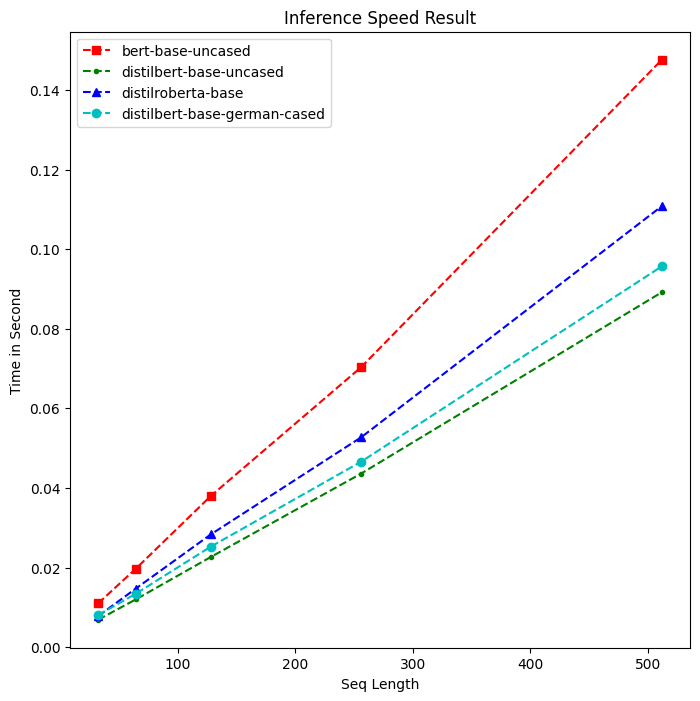

In [19]:
import matplotlib.pyplot as plt

# sequence_lengths = [32, 64, 128, 256, 512]
# batch_sizes = [4]
t = sequence_lengths
models_perf = [
    list(results.time_inference_result[m]["result"][batch_sizes[0]].values())
    for m in models
]

plt.figure(figsize=(8, 8))
plt.plot(
    t,
    models_perf[0],
    "rs--",
    t,
    models_perf[1],
    "g--.",
    t,
    models_perf[2],
    "b--^",
    t,
    models_perf[3],
    "c--o",
)

plt.xlabel("Seq Length")
plt.ylabel("Time in Second")
plt.title("Inference Speed Result")

plt.legend(models)
plt.show()